In [85]:
import matplotlib.pyplot as plt

In [86]:
from sklearn.cluster import KMeans

In [87]:
import sklearn.metrics as sm

In [88]:
import pandas as pd

In [89]:
import numpy as np

In [90]:
import time

In [91]:
%matplotlib inline

In [92]:
data = pd.read_csv('bcw_data.csv')

In [93]:
data.iloc[:,:10].values

array([[1002945, 5, 4, ..., 3, 2, 1],
       [1015425, 3, 1, ..., 3, 1, 1],
       [1016277, 6, 8, ..., 3, 7, 1],
       ...,
       [888820, 5, 10, ..., 8, 10, 2],
       [897471, 4, 8, ..., 10, 6, 1],
       [897471, 4, 8, ..., 10, 4, 1]], dtype=object)

In [94]:
data.iloc[:,10:].values

array([[2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [95]:
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [96]:
def convertToVals(X):
    myArray = []
    for x in X:
        if x == 4:
            myArray.append(1)
        elif x == 2:
            myArray.append(0)
    return myArray

In [97]:
df = pd.DataFrame(data.values)

In [98]:
df.drop(df[df[6]=='?'].index, inplace=True)

In [99]:
target = np.array(convertToVals(df.iloc[:,10:].values))

In [100]:
x1 = pd.DataFrame(data.iloc[:,:10].values)
x1.columns = ['Clump Thickness','Uniformity_Of_Cell_Size','Uniformity_Of_Cell_Shape','Marginal Adhesion','Single Epithelial Cell Size',
            'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses', 'Class']

In [101]:
x1

,Clump Thickness,Uniformity_Of_Cell_Size,Uniformity_Of_Cell_Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1
1,1015425,3,1,1,1,2,2,3,1,1
2,1016277,6,8,8,1,3,4,3,7,1
3,1017023,4,1,1,3,2,1,3,1,1
4,1017122,8,10,10,8,7,10,9,7,1
5,1018099,1,1,1,1,2,10,3,1,1
6,1018561,2,1,2,1,2,1,3,1,1
7,1033078,2,1,1,1,2,1,1,1,5
8,1033078,4,2,1,1,2,1,2,1,1
9,1035283,1,1,1,1,1,1,3,1,1


In [102]:
y1 = pd.DataFrame(target)
y1.columns = ['Targets']

In [103]:
x = pd.DataFrame(data.iloc[:,:10].values)
x.columns = ['Clump Thickness','Uniformity_Of_Cell_Size','Uniformity_Of_Cell_Shape','Marginal Adhesion','Single Epithelial Cell Size',
            'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses', 'Class']

y = pd.DataFrame(target)
y.columns = ['Targets']

In [104]:
target

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [105]:
model = KMeans(n_clusters=2)
model.fit(df.iloc[:,:10].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [106]:
data.iloc[:,:10].values

array([[1002945, 5, 4, ..., 3, 2, 1],
       [1015425, 3, 1, ..., 3, 1, 1],
       [1016277, 6, 8, ..., 3, 7, 1],
       ...,
       [888820, 5, 10, ..., 8, 10, 2],
       [897471, 4, 8, ..., 10, 6, 1],
       [897471, 4, 8, ..., 10, 4, 1]], dtype=object)

In [107]:
data.dtypes

1000025     int64
5           int64
1           int64
1.1         int64
1.2         int64
2           int64
1.3        object
3           int64
1.4         int64
1.5         int64
2.1         int64
dtype: object

Text(0.5,1,'K Mean Classification')

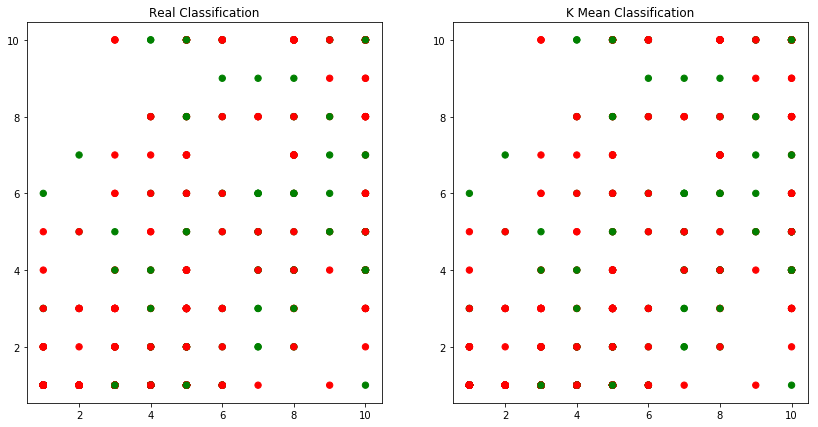

In [108]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'green',])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x1.Uniformity_Of_Cell_Size, x1.Uniformity_Of_Cell_Shape, c=colormap[y1.Targets], s=40)
plt.title('Real Classification')

# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x1.Uniformity_Of_Cell_Size, x1.Uniformity_Of_Cell_Shape, c=colormap[y1.Targets], s=40)
plt.title('K Mean Classification')

In [109]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
print (target)
print (predY)

[0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 

In [110]:
# Performance Metrics
sm.accuracy_score(target, predY)

0.6466275659824047

In [111]:
# Confusion Matrix
sm.confusion_matrix(target, predY)

array([[441,   2],
       [239,   0]], dtype=int64)

In [113]:
start_time = time.time()
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(df.iloc[:,:10])
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.02098870277404785 seconds ---
